# Week 5 / 2D code

This is a snippet of the relevant code used to make **2D** in the second assignment. This shows part of the Week 5, which only consists of the the calculation and visualization of K=3. Below this example is the calculating of the different kmeans models and packaging of the json file.

In [1]:
from csv import reader
from csv import writer
from collections import Counter

def isNew(x,y,found):
    if str(x)+str(y) in found:
        return False
    else:
        found.add(str(x)+str(y))
        return True

def isValid(x,y):
    if x > -122.5 and x < -122.0 and y < 38.0 and y > 37.5:
        return True
    else:
        return False

def readData(x):
    lines = 0
    # the data set
    dataFile = open("SFPD_Incidents.csv", 'r')
    
    for line in reader(dataFile):
        if line[9] == 'X':
            continue
    
        if line[1] == 'PROSTITUTION':        
            coorX = float(line[9])
            coorY = float(line[10])   
            lines += 1

            if isValid(coorX,coorY):
                x.append([coorX,coorY])
            else:
                continue
    


In [2]:
# Making K-means
from csv import reader 
import numpy as np
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x = []

readData(x)

X = np.array(x)
print X.shape

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

(15519, 2)


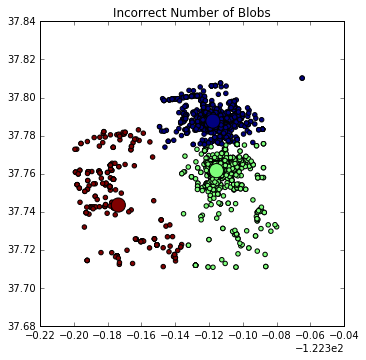

In [3]:
# Plotting!
%matplotlib inline
import matplotlib.pyplot as plt

colors = np.array(range(kmeans.cluster_centers_.shape[0]))

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c=colors)
plt.title("Incorrect Number of Blobs")

# Mega awesome data packaging

As stated in the assignment, we create a very optimized where we only include each point **once**. The same point is presented multiple times, and including all prostitution points would result in *15519* occurrences. Instead, we train the model with all data to ensure the correct cluster centers, and when creating the json, we only have one entry for each point, meaning we only have 1180 unique points. Then each point has an index to the cluster center which it is closest to.

This resulted in a file size at just **116 KB**.

In [4]:
def createJsonList(kmeans):
    list = []
    for i in range(kmeans.cluster_centers_.shape[0]):
        list.append([kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1]])
    
    return list

In [5]:
# Making K-means and packaging data
import json
from csv import reader 
import numpy as np
import pylab as pl
from collections import OrderedDict

from sklearn.cluster import KMeans

x = []
readData(x)
X = np.array(x)

kmeans_2 = KMeans(n_clusters=2)
y_pred_2 = kmeans_2.fit_predict(X)

kmeans_3 = KMeans(n_clusters=3)
y_pred_3 = kmeans_3.fit_predict(X)

kmeans_4 = KMeans(n_clusters=4)
y_pred_4 = kmeans_4.fit_predict(X)

kmeans_5 = KMeans(n_clusters=5)
y_pred_5 = kmeans_5.fit_predict(X)

kmeans_6 = KMeans(n_clusters=6)
y_pred_6 = kmeans_6.fit_predict(X)

points = []
found = set()

for i in range(y_pred_2.size):
    floatX = float(X[i,0])
    floatY = float(X[i,1])
    if isNew(floatX,floatY,found):
        k2 = int(y_pred_2[i])
        k3 = int(y_pred_3[i])
        k4 = int(y_pred_4[i])
        k5 = int(y_pred_5[i])
        k6 = int(y_pred_6[i])
        point = {'lat':floatY,'lon':floatX,'k2':k2,'k3':k3,'k4':k4,'k5':k5,'k6':k6}
        points.append(point)

k2 = createJsonList(kmeans_2)
k3 = createJsonList(kmeans_3)
k4 = createJsonList(kmeans_4)
k5 = createJsonList(kmeans_5)
k6 = createJsonList(kmeans_6)

data = OrderedDict([['k2',k2],['k3',k3],['k4',k4],['k5',k5],['k6',k6],['dataPoints',points]])

with open('2D.json', 'w') as txtfile:
    json.dump(data, txtfile, sort_keys=True)

The structure of the file will look like this:<br>
{<br>
<pre>"dataPoints":
[<pre>{"k2": 0, "k3": 0, "k4": 1, "k5": 3, "k6": 0, "lat": 37.7866144613366, "lon": -122.406401668335}, 
{"k2": 0, "k3": 0, "k4": 1, "k5": 3, "k6": 0, "lat": 37.7868849113107, "lon": -122.408201657254}, 
{"k2": 0, "k3": 0, "k4": 1, "k5": 3, "k6": 0, "lat": 37.787359494956, "lon": -122.408231026261}, 
{"k2": 0, "k3": 0, "k4": 1, "k5": 3, "k6": 0, "lat": 37.7854574902997, "lon": -122.400916029025}, 
{"k2": 1, "k3": 1, "k4": 0, "k5": 0, "k6": 1, "lat": 37.7570133986695, "lon": -122.418351237622}, 
{"k2": 1, "k3": 1, "k4": 0, "k5": 0, "k6": 1, "lat": 37.7604330003754, "lon": -122.415929849548}, ...],
</pre>"k2":<pre>[[-122.41773573931283, 37.787398010965298], [-122.41777932477329, 37.760610719288351]],
</pre>"k3": <pre>[[-122.41771492017926, 37.787598107981935], [-122.41564629917401, 37.761565899417512], [-122.47365129491254, 37.743481126461745]], </pre>
"k4": <pre>[[-122.41562084813076, 37.761675514524214], [-122.41771794197292, 37.787599543276912], [-122.48148075470402, 37.75904225629067], [-122.45730222215226, 37.719616988077661]], </pre>
"k5": <pre>[[-122.41582816056095, 37.761463667194413], [-122.41873463402293, 37.787644774670902], [-122.48148075470402, 37.75904225629067], [-122.40529189055023, 37.785184265715742], [-122.45730222215226, 37.719616988077661]], </pre>
"k6": <pre>[[-122.4052264027611, 37.785116422684396], [-122.41598913554678, 37.761726758895506], [-122.41873268078564, 37.787644837746299], [-122.48148075470402, 37.75904225629067], [-122.4040437900258, 37.72773672304826], [-122.46200922861391, 37.720342402977003]]</pre>
}